# Project Case: Boston Housing Data

## Statistics for Data Science with Python Final Project

Import libraries we need for project

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

### Load Dataset

In [16]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Data Description

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



### Generate Descriptive Statistics and Visualizations

__Boxplot for the "Median value of owner-occupied homes"__


[Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 0, 'Boxplot'),
 Text(0.5, 1.0, 'Boxplot for Median value of owner-occupied homes')]

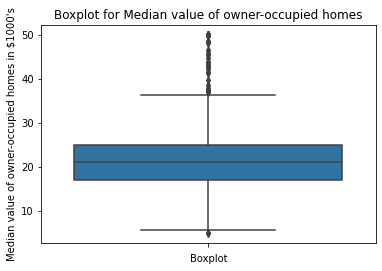

In [17]:
# Boxplot for the "Median value of owner-occupied homes" 

ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set(ylabel = "Median value of owner-occupied homes in $1000's", 
       xlabel = "Boxplot", 
       title = "Boxplot for Median value of owner-occupied homes")

__Explanation__: In the Boxplot we can see that there are various outliers below the first quartile and many above the third quartile. The Median as per the BoxPlot is shown in the plot is approximately 21 or 22.

__Histogram for the Charles River variable (1 if tract bounds river; 0 otherwise)__

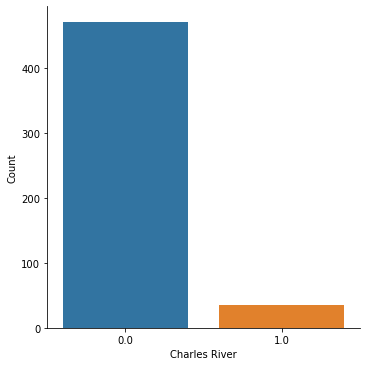

In [18]:
# Histogram for the Charles river variable

ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
ax.set_titles("Charles River")
ax.set_axis_labels(x_var="Charles River", y_var="Count")

__Explanation__: This histogram shows that there are far more houses that are not bound by the Charles River.

__Boxplot for the MEDV variable vs the AGE variable.__ 
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


[Text(0.5, 0, 'Proportion of owner-occupied units built prior to 1940'),
 Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable.')]

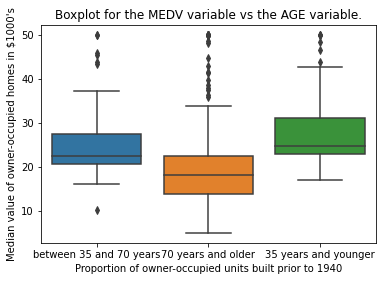

In [19]:
# Boxplot for the MEDV variable vs the AGE variable

# Discretize the age variable into three groups
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x = "age_group", y='MEDV', data=boston_df)
ax.set(xlabel = "Proportion of owner-occupied units built prior to 1940", 
       ylabel = "Median value of owner-occupied homes in $1000's", 
       title = "Boxplot for the MEDV variable vs the AGE variable.")

__Explanation__: The Medians from the BoxPlot is approximateley 25 for the age group "35 years and younger", approximateley 18 or 17 for the age group "70 years and older", and approximateley 22 for the age group "between 35 and 70 years". The Boxplot also shows that there are various outliers above the third quartile for all groups. 

__Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?__


[Text(0, 0.5, 'Nitric Oxides concentration (parts per 10 million)'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town.'),
 Text(0.5, 1.0, 'Scatter Plot between NOX and INDUS')]

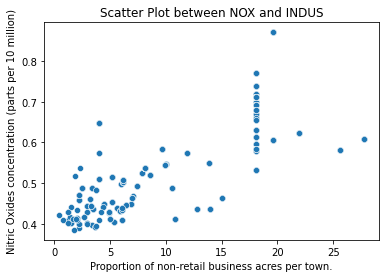

In [20]:
# Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set(ylabel = "Nitric Oxides concentration (parts per 10 million)", 
       xlabel = "Proportion of non-retail business acres per town.",
       title = "Scatter Plot between NOX and INDUS")

__Explanation__: The scatterplot shows that there is a near linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. This indicates that there positive correlation as the points move in the positive direction

__Histogram for the pupil to teacher ratio variable__

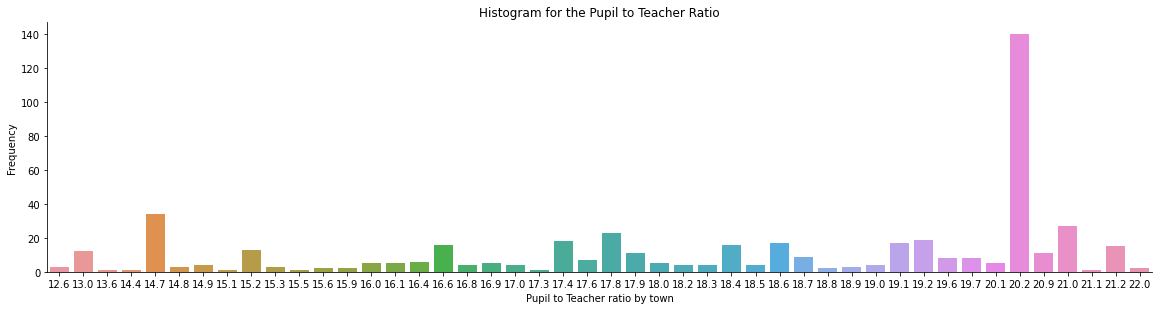

In [21]:
# Histogram for the pupil to teacher ratio variable
ax = sns.catplot(x='PTRATIO', kind='count', data=boston_df,
                height = 4, aspect = 4)
ax.set(xlabel = "Pupil to Teacher ratio by town", 
             ylabel = "Frequency", 
             title = "Histogram for the Pupil to Teacher Ratio")

__Explanation__: The histogram shows fluctuating pupil to teacher ratios for the diffeerent towns between 0 to about 38. However, there is a town with a significantly higher ratio of almost 140. 


### Use the appropriate tests to answer the questions provided.

__Is there a significant difference in median value of houses bounded by the Charles river or not?__ (T-test for independent samples)

State the hypothesis:
- Null: There is not a significant difference in median value of houses bounded by the Charles river
- Alternative: There is a significant difference in median value of houses bounded by the Charles river

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

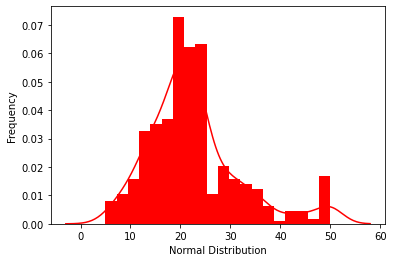

In [22]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

# we can assume it is normal

In [23]:
# Using Levene's test to check for equal variance 

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

# since the p-value is less than 0.05 we can assume inequality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [24]:
# T test with unequal varinace 

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

__Conclusion__: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river.

__Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?__ (ANOVA)

State the hypothesis:
- Null: There is not a significant difference in median value of houses for each proportion of owner occupied units built prior to 1940
- Alternative: There is a significant difference in median value of houses for each proportion of owner occupied units built prior to 1940


In [25]:
# Test for equality of variance

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is more than 0.05 we can assume equality of variance

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [26]:
# Create subsets for each age group

thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thrityfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'] 
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

# ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thrityfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


__Conclusion__: Since the p-value is much less than alpha value 0.05, we reject the null hypothesis and conclude that there is a staistical difference in median values of houses for each proportion of owner occupied units built prior to 1940.

__Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?__ (Pearson Correlation)

State the hypothesis:
- Null: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
- Alternative: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


In [27]:
# Pearsons correlation test

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


(0.7636514469209151, 7.913361061238693e-98)

__Conclusion__: Since the p-value is much less than alpha value 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

__What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?__ (Regression analysis)

State the hypothesis:
- Null: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
- Alternative: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes


In [28]:
# X is the input variables (or independent variables)
X = boston_df['DIS']

# y is the target/dependent variable
y = boston_df['MEDV']

# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.21e-08
Time:                        21:43:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Conclusion__: The p-value is less than the alpha value 0.05, so we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient is positive 1.0916 which also signifies that the impact increases by 1.0916 when there is an additional weighted distance to the five Boston employment centres.